In [1]:
ls

Aggregation.txt                noisy_circles79frames.gif
Aggregation.txt12frames.gif    noisy_moons100frames.gif
Aggregation.txt20frames.gif    no_structure100frames.gif
Aggregation.txt22frames.gif    pathbased.txt100frames.gif
Aggregation.txt3frames.gif     pogo.ipynb
animation-400.mp4              R15.txt
animation-b.mp4                R15.txt100frames.gif
animation-c.mp4                R15.txt17frames.gif
animation-d.mp4                R15.txt22frames.gif
animation.gif                  R15.txt36frames.gif
animation.mp4                  R15.txt93frames.gif
aniso100frames.gif             README.md
aniso60frames.gif              spiral20frames.mp4
Compound.txt                   spiral40frames.mp4
Compound.txt22frames.gif       spiral.txt
D31.txt                        spiral.txt19frames.gif
D31.txt22frames.gif            spiral.txt20frames.gif
dbscan-demo-data100frames.gif  spiral.txt29frames.gif
dbscan-demo-data79frames.gif   spiral.txt49frames.gif
dbscan-demo-data99frames.gif   spira

In [2]:
import numpy as np
import pandas as pd
import gudhi

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection

In [4]:

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import os.path

In [5]:
from urllib.request import urlopen
from urllib.parse import urlparse

In [6]:
%matplotlib inline

In [7]:
cmap = plt.cm.get_cmap("flag").copy()
cmap.set_bad(cmap(0))
cmap.set_under(cmap(1))
cmap.get_bad()
#cmap(number_of_clusters)

array([1., 0., 0., 1.])

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [8]:
#DBSCAN Demo Data from scikitlearn
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

In [9]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.ones(n_samples,dtype='int')

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [10]:
X=varied[0]
y=varied[1]
filename = 'varied'


In [11]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [12]:
urls_with_ground_truth

{'D31.txt': 'https://cs.joensuu.fi/sipu/datasets/D31.txt',
 'spiral.txt': 'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
 'pathbased.txt': 'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
 'R15.txt': 'https://cs.joensuu.fi/sipu/datasets/R15.txt'}

In [13]:
ground_truth

{'overlap.pa': 'https://cs.joensuu.fi/sipu/datasets/overlap.pa'}

In [14]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename
    else:
        pass

In [15]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


In [16]:
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

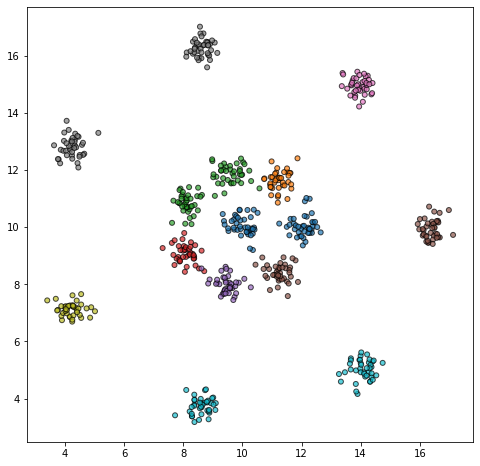

In [17]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [18]:
rips_complex = gudhi.RipsComplex(points=X)

In [19]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
   
print(simplex_tree.num_vertices() , 'vertices')  
print(simplex_tree.num_simplices(), 'simplices')
print('dimension:', simplex_tree.dimension())

600 vertices
180300 simplices
dimension: 1


usetex mode requires TeX.


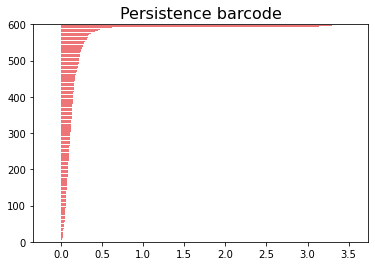

In [20]:
diag = simplex_tree.persistence()
gudhi.plot_persistence_barcode(diag)
plt.show()

In [21]:
#move through list and assign clusters to conected components
point_dict={i:0 for i in range(simplex_tree.num_vertices())}
counter=0
cluster_dict_list = []
distance_list = []
for simplex in simplex_tree.get_filtration():
    if len(simplex[0])>1:
        if all(value > 0 for value in list(point_dict.values())):
            if len(np.unique(np.array(list(point_dict.values())))) == 1:
                print('break')
                print(simplex)
                print(simplex[1])
                simplex_tree.prune_above_filtration(simplex[1])
                break


        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] == 0:
            counter += 1
            point_dict[simplex[0][0]] = counter
            point_dict[simplex[0][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] != 0:
            point_dict[simplex[0][0]] = point_dict[simplex[0][1]]

            #and vice versa
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] == 0:
            point_dict[simplex[0][1]] = point_dict[simplex[0][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] != 0 and point_dict[simplex[0][0]] != point_dict[simplex[0][1]]:
            larger_cluster_number = max(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            smaller_cluster_number = min(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
                    
        distance_list.append(simplex[1])
        cluster_dict_list.append(point_dict.copy())

break
([72, 278], 3.394113728206525)
3.394113728206525


In [22]:
max(distance_list)

3.394080729741118

In [23]:
len(distance_list)

42270

In [24]:
distance_array = np.array(distance_list)
print(len(distance_array))
distance_array.dtype

42270


dtype('float64')

In [25]:
length = len(cluster_dict_list)
length

42270

In [26]:
print(simplex_tree.num_simplices(), 'simplices')
#?

42871 simplices


In [27]:
#check that all clusters have merged
len(np.unique(np.array(list(point_dict.values()))))

1

In [28]:
print(cluster_dict_list[-2].values()) #penultimate clustering has 2 clusters
print(cluster_dict_list[-1].values()) #last clustering finally merges to all one cluster

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [29]:
#find the gaps between birth/death pairs
gaps = np.diff(distance_array)
gaps.shape

(42269,)

In [30]:
#add a zero back to the beginning of the gaps
gaps = np.concatenate([np.zeros(1),gaps])

In [31]:
#find normalized distance
scaler = MinMaxScaler()
normed_distance = scaler.fit_transform(distance_array.reshape(-1,1)).T.reshape(length)

In [32]:
#then invert them and multiply by the gaps to weight early connections in the filtration
inverted_normed_distance = 1 - normed_distance
inverted_normed_distance

array([1.00000000e+00, 9.99755776e-01, 9.99271204e-01, ...,
       3.42227812e-05, 1.05967767e-05, 0.00000000e+00])

In [33]:
#and square it to increase the weighting
#inverted_normed_distance = np.power(inverted_normed_distance,2)

In [34]:
inverted_normed_distance

array([1.00000000e+00, 9.99755776e-01, 9.99271204e-01, ...,
       3.42227812e-05, 1.05967767e-05, 0.00000000e+00])

In [35]:
normed_gaps = np.multiply(gaps, inverted_normed_distance)
normed_gaps

array([0.00000000e+00, 8.28224803e-04, 1.64251090e-03, ...,
       1.67386028e-09, 8.49239617e-10, 0.00000000e+00])

In [36]:
#normalize to create a probability vector
gap_vector = normed_gaps / np.sum(normed_gaps)

In [37]:
#check
np.sum(gap_vector)

0.9999999999999999

In [38]:
gap_vector

array([0.00000000e+00, 4.88358658e-04, 9.68498427e-04, ...,
       9.86983436e-10, 5.00749939e-10, 0.00000000e+00])

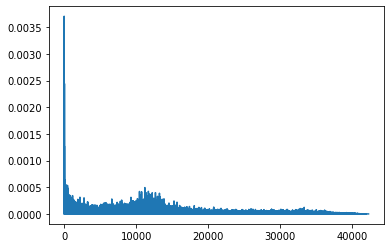

In [39]:
plt.plot(gap_vector)

In [40]:
marker = 0
for i in range(1,length-1):
    if cluster_dict_list[marker] == cluster_dict_list[i]:

        gap_vector[marker] += gap_vector[i]
        gap_vector[i] = 0
        #print(marker)


    else:
        marker = i

1.0000000000000047


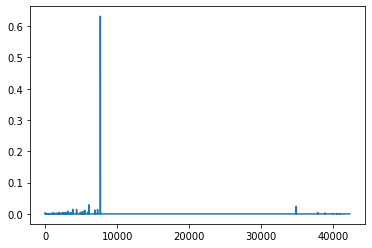

In [41]:
print(np.sum(gap_vector))
plt.plot(gap_vector)

In [42]:
candidates = np.flip(np.argsort(gap_vector))

In [43]:
counter = 0
idx = candidates[counter]
print(idx)
if idx < simplex_tree.num_vertices():
    counter += 1
    print(counter)
    idx = candidates[counter]
    print(idx)

7643


In [44]:
pred = np.array(list(cluster_dict_list[idx].values()))

In [45]:
gap_vector[candidates[0]]

0.6318600580212643

In [46]:
print(gap_vector[idx])
print('percent confidence')
'{:.1%}'.format(gap_vector[idx])

0.6318600580212643
percent confidence


'63.2%'

In [47]:
np.array(list(cluster_dict_list[idx].values()))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [48]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

8
your dataset appears to have 8 clusters, not including any outliers


In [49]:
true = y

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

0.2636754763368162
0.7808281507901929


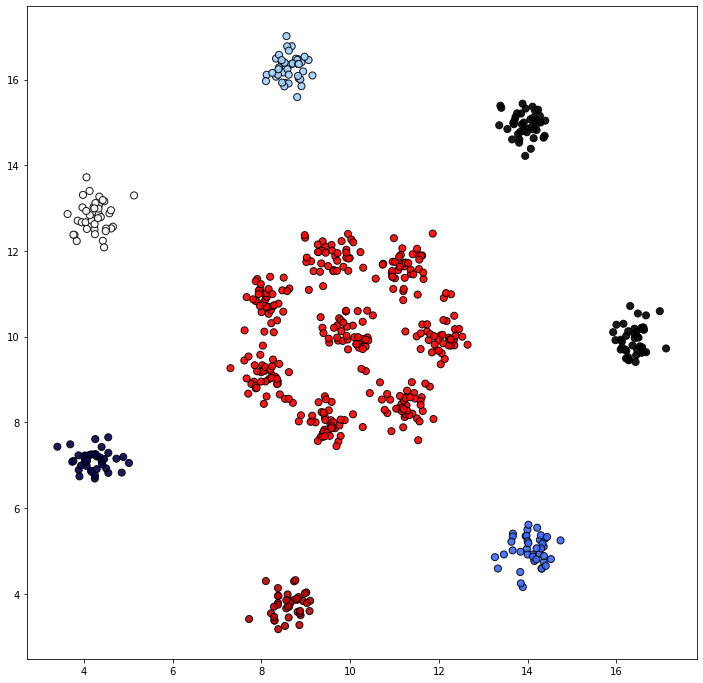

In [50]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=np.array(list(cluster_dict_list[idx].values())),
            marker="o",
            cmap='flag',
            norm=None,
            alpha=.9,
            edgecolor="k")

In [51]:
idx_list = []
for i in range(len(candidates)):
    if candidates[i] > simplex_tree.num_vertices():
        idx_list.append(candidates[i])
    else:
        break


In [52]:
idx_list = candidates[:100]
idx_list

array([ 7643,  6053, 34848,  3807,  7259,  4346,  6889,  5481,  3187,
        5236,  4962,  5887, 37832,  3481,  1903,  3613,  2781,  4837,
           3,  2606,  2452,  2933, 38864,  3018,  1171,  2380,  2315,
          41,  5160,  2244,  1708,  1009,  1575,  1277,  1082,   837,
           4,  2708,  1045,  2066,   955,  1815,  3744,    37,  4297,
        1872,    31,  3145,  1452,  1617,  2567,  2116,  2145,     7,
        3112,   469,    38,  3452,  1341,     8,  1533,    33,  1062,
        1254,  1655,  2034, 39976,  1513,   977,     2,  2208,   914,
       40905,   338,   129,  1118,    23,  1683,  2759,  1377,   224,
          54,  2541,   824,  1140,  1754,  2297,  2019,  1323,  1851,
          19,  1222,   627,  2185,   460,   929,  1788, 40485,  2739,
         776])

In [53]:
idx_list.sort()

In [54]:
#idx_list = [x for x in idx_list if x < idx]

In [55]:
idx_array = np.asarray(idx_list)
idx_array

array([    2,     3,     4,     7,     8,    19,    23,    31,    33,
          37,    38,    41,    54,   129,   224,   338,   460,   469,
         627,   776,   824,   837,   914,   929,   955,   977,  1009,
        1045,  1062,  1082,  1118,  1140,  1171,  1222,  1254,  1277,
        1323,  1341,  1377,  1452,  1513,  1533,  1575,  1617,  1655,
        1683,  1708,  1754,  1788,  1815,  1851,  1872,  1903,  2019,
        2034,  2066,  2116,  2145,  2185,  2208,  2244,  2297,  2315,
        2380,  2452,  2541,  2567,  2606,  2708,  2739,  2759,  2781,
        2933,  3018,  3112,  3145,  3187,  3452,  3481,  3613,  3744,
        3807,  4297,  4346,  4837,  4962,  5160,  5236,  5481,  5887,
        6053,  6889,  7259,  7643, 34848, 37832, 38864, 39976, 40485,
       40905])

In [56]:
silhouette_list = []
for i in idx_list:
    
    silhouette = metrics.silhouette_score(X, np.array(list(cluster_dict_list[i].values())), metric="euclidean")
    silhouette_list.append(silhouette)

In [57]:
silhouette_array = np.asarray(silhouette_list)

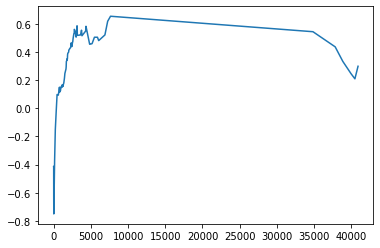

In [58]:
plt.plot(idx_array,silhouette_array)

In [59]:
idx = idx_array[silhouette_array.argmax()]
idx

7643

In [60]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.2636754763368162

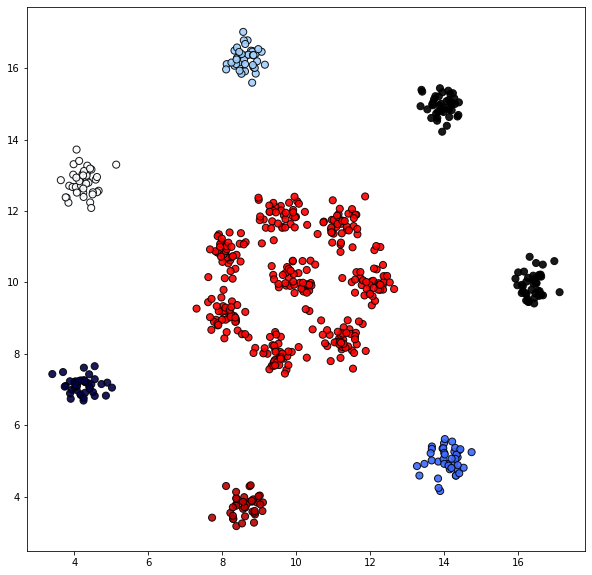

In [61]:
size=10
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [62]:
new_scaler = np.arange(len(gap_vector))
scaler = MinMaxScaler()
new_scaler = scaler.fit_transform(new_scaler.reshape(-1,1))
new_scaler = 1 - new_scaler
#new_scaler = np.square(new_scaler)
new_scaler = new_scaler.reshape(len(gap_vector))

In [63]:
inverted_normed_silhouette_array = np.multiply(silhouette_array,new_scaler[idx_array])

In [64]:
inverted_normed_silhouette_array

array([-0.41286637, -0.41203612, -0.46428818, -0.5692299 , -0.6210759 ,
       -0.75038625, -0.73380182, -0.70761324, -0.69751823, -0.70801261,
       -0.7028104 , -0.697122  , -0.64476351, -0.36844932, -0.15054168,
       -0.02765099,  0.09568227,  0.09621091,  0.09122781,  0.14639122,
        0.11271735,  0.11414739,  0.12253608,  0.12459406,  0.14555429,
        0.14187329,  0.14481958,  0.14637214,  0.14888243,  0.15475147,
        0.15997941,  0.16060611,  0.14588346,  0.15862739,  0.15133594,
        0.15716781,  0.16722744,  0.16879705,  0.17774961,  0.20688712,
        0.23936632,  0.24288069,  0.25110889,  0.25984331,  0.26690342,
        0.2820845 ,  0.31872924,  0.32333617,  0.33495525,  0.32793154,
        0.33753416,  0.36359505,  0.37217723,  0.37989702,  0.39283872,
        0.39396819,  0.39799075,  0.40046651,  0.40081783,  0.40458212,
        0.40637202,  0.40735506,  0.43617194,  0.43682541,  0.41271203,
        0.44153238,  0.44271796,  0.46177056,  0.49289082,  0.49

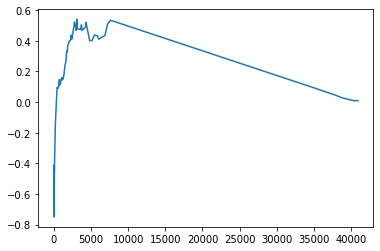

In [65]:
plt.plot(idx_array,inverted_normed_silhouette_array)

In [66]:
idx = idx_array[inverted_normed_silhouette_array.argmax()]
idx

3145

In [67]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.8919489724845739

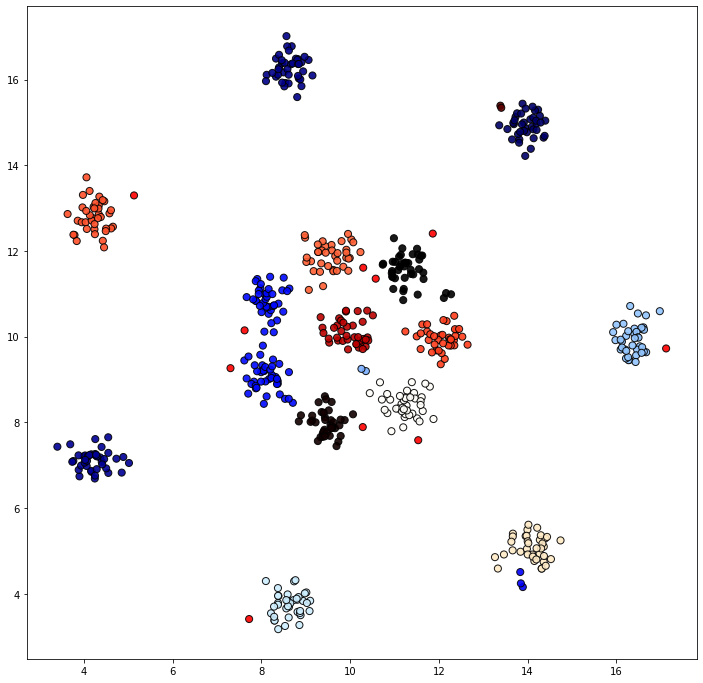

In [68]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [69]:
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.8919489724845739

In [70]:
masked = np.ma.masked_where(metrics.rand_score(true, pred) == 1,pred)
masked

masked_array(data=[  9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
                     9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
                     9, 143,   9,   9,   9,   9,   9,   9,   9,   9,   9,
                     9,   9,   9,   9,   9,   9, 143,  19,  19,  19,  19,
                    19,  19,  19,  19,  19,  19,  19, 147,  19,  19,  19,
                    19,  19,  19,  19,  19,  19,  19,  19,  19,  19, 147,
                    19,  19, 147,  19,  19,  19,  19,  19,  19,  19,  19,
                    19,  19,  19,   7,   7,   7,   7,   7,   7,   7,   7,
                     7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
                     7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
                     7,   0,   7,   7,   7,   7,   7,   7,   7,   7,   1,
                     1,   1,   1,   1,   1,   1,   0,   1,   1,   1,   1,
                     1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
                     1,   1,   1,   1,

In [71]:
masked = np.ma.masked_where(pred == 0,pred)
masked

masked_array(data=[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                   9, 9, 9, 9, 9, 143, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                   9, 9, 9, 143, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                   19, 147, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                   19, 19, 147, 19, 19, 147, 19, 19, 19, 19, 19, 19, 19,
                   19, 19, 19, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                   7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                   --, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, --, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, --, 5, 5, 5, 5, 5,
                   5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   --, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   5, 5, 5, 5, 5, 5, --, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   5, 5, 5, 5, 5, 5, 5, 5, 5

In [72]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

18
your dataset appears to have 18 clusters, not including any outliers


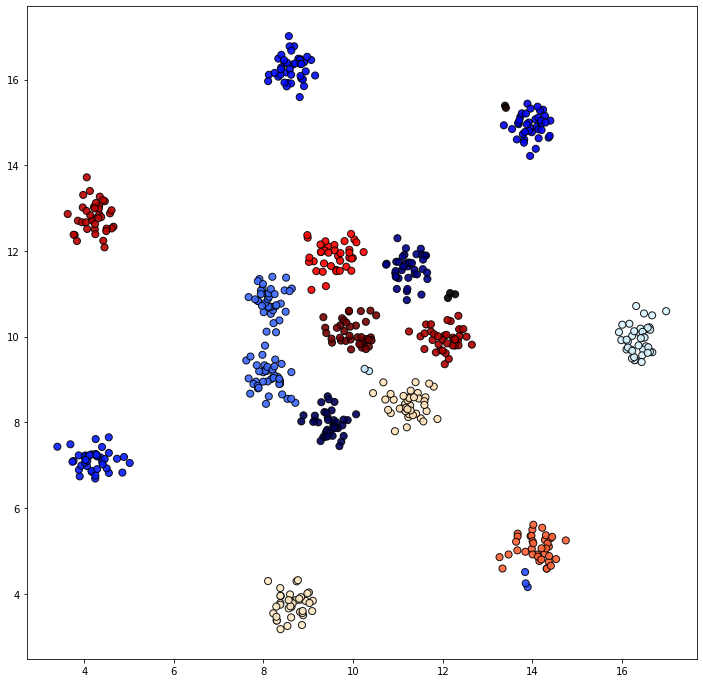

In [73]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=masked,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [74]:
def get_first_max(array):
    for i in range(len(array)):
        if idx_array[i] > 2*simplex_tree.num_vertices():

            if array[i] > array[i+1] and array[i+2]and array[i+3]and array[i+4]:

                return float(array[i])

In [75]:
first_max = get_first_max(silhouette_array)
idx_array[np.where(silhouette_array == first_max)]

array([1222])

In [76]:
idx = int(idx_array[np.where(silhouette_array == first_max)])
idx

1222

In [77]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.6236860750511757

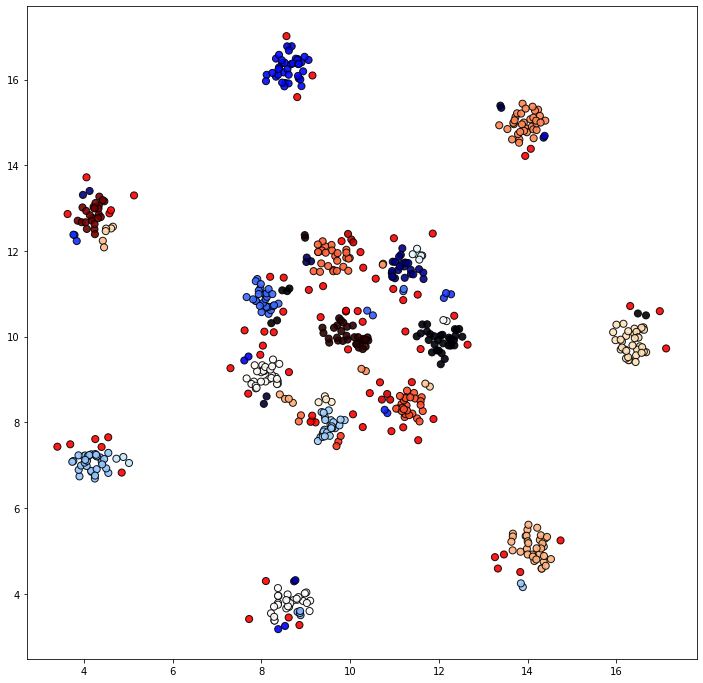

In [78]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [79]:
rand_score_list = []
true = y
for i in idx_list:
    pred = np.array(list(cluster_dict_list[i].values()))
    rand_score = metrics.adjusted_rand_score( true, pred)
    rand_score_list.append(rand_score)

In [80]:
rand_score_array = np.asarray(rand_score_list)

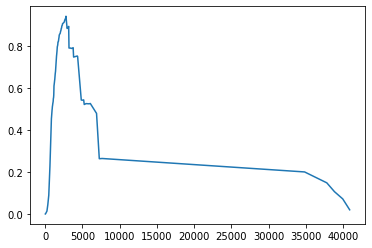

In [81]:
 plt.plot(idx_array,rand_score_array)

In [82]:
max(rand_score_array)

0.9402441277383992

In [83]:
idx = idx_array[rand_score_array.argmax()]
idx

2781

In [84]:
pred = np.array(list(cluster_dict_list[idx].values()))
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.9402441277383992

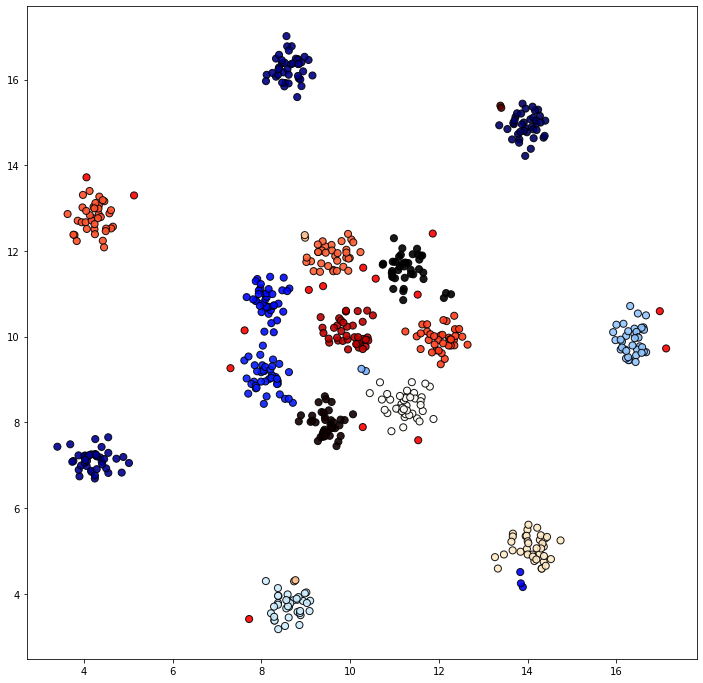

In [85]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

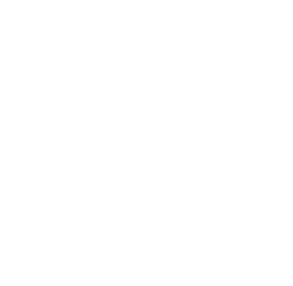

In [86]:
fig, ax = plt.subplots(figsize=(5,5))
frames = len(idx_array)
ax.set_axis_off()

outfile = filename + str(frames) + 'frames.gif'

if not os.path.isfile(outfile):
    def init():
        scatter = ax.scatter(X[:, 0], X[:, 1],
                        s=30, 
                        c=np.array(list(cluster_dict_list[0].values())),
                        marker="o",
                        cmap=cmap,
                        norm=None,
                        alpha=1,
                        edgecolor="k")
        #ax.set(xlim=(-1, 35), ylim=(-1, 35))

        return scatter,

    #collection = PatchCollection(X, animated=True)

    #ax.add_collection(collection)
    #ax.autoscale_view(True)

    def animate(i):

        scatter = ax.scatter(X[:, 0], X[:, 1],
                    s=30, 
                    c=np.array(list(cluster_dict_list[idx_array[i]].values())),
                    marker="o",
                    cmap=cmap,
                    norm=None,
                    alpha=1,
                    edgecolor="k")
        return scatter,



    ani = FuncAnimation(fig, animate,interval=180,init_func=init,frames=frames,repeat=False, blit=True)

    #ani.save('animation.gif')



    #writer=animation.PillowWriter()

    #writer = animation.FFMpegWriter(fps=2,bitrate=1000)

    ani.save(outfile,dpi=300)
    fig.show()


def pogo(dataset):
    rips_complex = gudhi.RipsComplex(points=dataset,max_edge_length=100)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])
    #move through list and assign clusters to conected components

    point_dict={i:0 for i in range(simplex_tree.num_vertices())}
    counter=0

    cluster_dict_list = []
    for i in range(simplex_tree.num_vertices(),len(df)):
        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            counter += 1
            point_dict[df.loc[i,'simplex'][0]] = counter
            point_dict[df.loc[i,'simplex'][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] != 0:
            point_dict[df.loc[i,'simplex'][0]] = point_dict[df.loc[i,'simplex'][1]]

            #and vice versa
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            point_dict[df.loc[i,'simplex'][1]] = point_dict[df.loc[i,'simplex'][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] != 0 and point_dict[df.loc[i,'simplex'][0]] != point_dict[df.loc[i,'simplex'][1]]:
            larger_cluster_number = max(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            smaller_cluster_number = min(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())
        #print(point_dict)
        #print('step',i)

    
    cutoff_value = 0
    for i in range(len(cluster_dict_list)):
        if cutoff_value == 0:
            if all(value != 0 for value in cluster_dict_list[i].values()):
                cutoff_value = i
                print('dataset becomes connected at simplex #',cutoff_value)
       
    df = df[:cutoff_value]
    #cluster_dict_list =
    
    #find the gaps between birth/death pairs

    df['gaps'] = df['distance'] - df['distance'].shift(1)
    
    #find normalized distance
    scaler = MinMaxScaler()
    df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

    #Mulitply the gaps by their normed location in the filtration, weighting features more heavily if they're later
    df['normed_gaps'] = df['gaps'] * df['normed_distance']

    norm_sum = df['normed_gaps'].sum()
    df['probability_vector_normed_gaps'] = df['normed_gaps'] / norm_sum
    
    gap_sum = df['gaps'].sum()
    df['probability_vector_gaps'] = df['normed_gaps'] / gap_sum

    partition = 10
    candidates = [i for i in df.nlargest(partition ,['gaps']).index if i in df.nlargest( partition,['normed_gaps']).index]
    #print('possible cuttoffs' , candidates)
    idx = cutoff_value - 1
    #idx = candidates[0]
    print('idx' ,idx)

    print('your dataset appears to have', len(np.unique(np.array(list(cluster_dict_list[idx].values())))),'clusters')

    #print( np.array(list(cluster_dict_list[idx].values())))

    print(simplex_tree.num_vertices() , 'vertices')  
    print(simplex_tree.num_simplices(), 'simplices')
    print('dimension:', simplex_tree.dimension())

    size=10
    plt.figure(figsize=(size,size))
    plt.scatter(dataset[:, 0], dataset[:, 1],
                s=30, 
                c=np.array(list(cluster_dict_list[idx].values())),
                marker="o",
                cmap='rainbow',
                norm=None,
                alpha=.9,
                edgecolor="k")
    
    return cluster_dict_list, candidates, idx


cluster_dict_list, candidates, idx = pogo(X)

true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print('adjusted rand score =' , metrics.adjusted_rand_score(true, pred))
